In [1]:

import pandas as pd
import numpy as np
import os

#Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
ModNoSAm_folder = os.getcwd()
from Bucaramanga_Nest_GMM.NoSAm_Nest2024 import NoSAm_Nest as PajaroEtAl_2024_Nest
from Crustal_GMM.NoSAm_Crustal2023 import NoSAm_Crustal_2023 as ArtetaEtAl_2023_Crustal
from Subduction_GMMs.NoSAm_Sub2021 import NoSAm_Sub2021 as ArtetaEtAl_2021_Sub

# RESPONSE SPECTRA COMPARISON

In [3]:
#Fixed Parameters
SoilCat = 2 # Rock/Stiff Soils Sites
AmpHVRSRs = 'Average'
HypoD_Crustal = 10
Rvolc_test = 0
FABA_Flag = 0

In [4]:
Mags_Crustal = [4.5, 5.5, 6.5, 7.5]
Mags_Subd = [5.0, 6.0, 7.0, 8.0]
Mags_Nest = [4.5, 5.5, 6.5]

Pers = [0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.15, 0.2,
           0.25, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 6, 7.5, 10]

RSP_Mags_Crustal = pd.DataFrame(data = np.zeros([len(Pers),len(Mags_Crustal)]),
                    columns = ['$M_{w}$: %0.1f'%(el) for el in Mags_Crustal],
                    index= Pers)
RSP_Mags_Crustal['Period'] = Pers

RSP_Mags_Interface = pd.DataFrame(data = np.zeros([len(Pers),len(Mags_Subd)]),
                    columns = ['$M_{w}$: %0.1f'%(el) for el in Mags_Subd],
                    index= Pers)
RSP_Mags_Interface['Period'] = Pers

RSP_Mags_Intraslab = pd.DataFrame(data = np.zeros([len(Pers),len(Mags_Subd)]),
                    columns = ['$M_{w}$: %0.1f'%(el) for el in Mags_Subd],
                    index= Pers)
RSP_Mags_Intraslab['Period'] = Pers

RSP_Mags_Nest = pd.DataFrame(data = np.zeros([len(Pers),len(Mags_Nest)]),
                    columns = ['$M_{w}$: %0.1f'%(el) for el in Mags_Nest],
                    index= Pers)
RSP_Mags_Nest['Period'] = Pers



## Crustal

In [5]:
Mags = Mags_Crustal
Rtest_mag = 20

for i_mag in range(len(Mags)):
    RSP = []
    RSP_GL = []
    Mag = Mags[i_mag]
    Amp_HVRSR = 'Average'

    for i_per in range(len(Pers)):
        T = Pers[i_per]

        [mean, tau, phi, Sigma, SigmaSS] = ArtetaEtAl_2023_Crustal(T, Mag, Rtest_mag, SoilCat, Amp_HVRSR, HypoD_Crustal, Rvolc_test)
        
        RSP.append(mean)
        
    RSP_Mags_Crustal['$M_{w}$: %0.1f'%(Mag)] = RSP
    

## Interface

In [6]:
Mags = Mags_Subd
Rtest_inter = 50
for i_mag in range(len(Mags)):
    RSP = []
    RSP_GL = []
    Mag = Mags[i_mag]

    for i_per in range(len(Pers)):
        T = Pers[i_per]

        [mean, tau, phi, Sigma, SigmaSS] = ArtetaEtAl_2021_Sub(T, 'Interface', Mag, Rtest_inter, SoilCat, Amp_HVRSR, FABA_Flag)
        RSP.append(mean)
        
    RSP_Mags_Interface['$M_{w}$: %0.1f'%(Mag)] = RSP

## Intra-slab

In [7]:
Mags = Mags_Subd
Rtest_intra = 100
for i_mag in range(len(Mags)):
    RSP = []
    RSP_GL = []
    Mag = Mags[i_mag]

    for i_per in range(len(Pers)):
        T = Pers[i_per]

        [mean, tau, phi, Sigma, SigmaSS] = ArtetaEtAl_2021_Sub(T, 'Intra-slab', Mag, Rtest_intra, SoilCat, Amp_HVRSR, FABA_Flag)
        RSP.append(mean)

    RSP_Mags_Intraslab['$M_{w}$: %0.1f'%(Mag)] = RSP

## Bucaramanga Nest


In [8]:
Mags = Mags_Nest
Rtest_intra = 100
for i_mag in range(len(Mags)):
    RSP = []
    RSP_GL = []
    Mag = Mags[i_mag]

    for i_per in range(len(Pers)):
        T = Pers[i_per]

        [mean, tau, phi, Sigma, SigmaSS] = PajaroEtAl_2024_Nest(T, Mag, Rtest_intra, SoilCat, Amp_HVRSR)
        RSP.append(mean)

    RSP_Mags_Nest['$M_{w}$: %0.1f'%(Mag)] = RSP

# Plot RSP

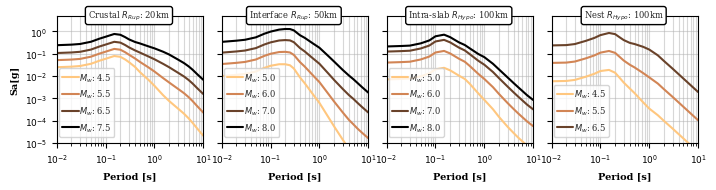

In [9]:
width = 18 # en cm
height = 4.5 # en cm
OutFile_Name = 'NoSAM_GMMs_RSP_Models.jpeg'
fsize = 8

fig, axs = plt.subplots(1,4, sharey=True, sharex=True, figsize=(width/2.54, height/2.54))

Line_styles = ['-', '-','-', '-', '-']
Line_width = [1.5, 1.5,1.5, 1.5, 1.5]
ms = 1.5
sns.set_style('whitegrid')

lw = 1.5
ls = '-'
colors_Mag = plt.cm.copper_r(np.linspace(0,1,len(Mags_Crustal)))
Tags_Crustal = RSP_Mags_Crustal.columns
for i_Mag in range(len(Mags_Crustal)):
    Mag = Mags_Crustal[i_Mag]
    reg_Model = RSP_Mags_Crustal['$M_{w}$: %0.1f'%(Mag)]
    axs[0].loglog(RSP_Mags_Crustal['Period'], reg_Model, ls,
                color=colors_Mag[i_Mag], linewidth=lw, label= Tags_Crustal[i_Mag], markersize = ms)

colors_Subd = plt.cm.copper_r(np.linspace(0,1,len(Mags_Subd)))
Tags_Subd = RSP_Mags_Interface.columns
for i_Mag in range(len(Mags_Subd)):
    Mag = Mags_Subd[i_Mag]
    reg_Model = RSP_Mags_Interface['$M_{w}$: %0.1f'%(Mag)]
    axs[1].loglog(RSP_Mags_Interface['Period'], reg_Model, ls,
                color=colors_Mag[i_Mag], linewidth=lw, label=Tags_Subd[i_Mag], markersize = ms)

colors_Subd = plt.cm.copper_r(np.linspace(0,1,len(Mags_Subd)))
Tags_Subd = RSP_Mags_Intraslab.columns
for i_Mag in range(len(Mags_Subd)):
    Mag = Mags_Subd[i_Mag]
    reg_Model = RSP_Mags_Intraslab['$M_{w}$: %0.1f'%(Mag)]
    axs[2].loglog(RSP_Mags_Intraslab['Period'], reg_Model, ls,
                color=colors_Mag[i_Mag], linewidth=lw, label=Tags_Subd[i_Mag], markersize = ms)

colors_Nest = plt.cm.copper_r(np.linspace(0,1,len(Mags_Nest)))
Tags_Nest = RSP_Mags_Nest.columns
for i_Mag in range(len(Mags_Nest)):
    Mag = Mags_Nest[i_Mag]
    reg_Model = RSP_Mags_Nest['$M_{w}$: %0.1f'%(Mag)]
    axs[3].loglog(RSP_Mags_Nest['Period'], reg_Model, ls,
                color=colors_Mag[i_Mag], linewidth=lw, label=Tags_Nest[i_Mag], markersize = ms)

axs[0].set_xlabel('Period [s]', fontdict={'fontsize': fsize-1, 'fontname': 'serif', 'fontweight': 'bold'})
axs[1].set_xlabel('Period [s]', fontdict={'fontsize': fsize-1, 'fontname': 'serif', 'fontweight': 'bold'})
axs[2].set_xlabel('Period [s]', fontdict={'fontsize': fsize-1, 'fontname': 'serif', 'fontweight': 'bold'})
axs[3].set_xlabel('Period [s]', fontdict={'fontsize': fsize-1, 'fontname': 'serif', 'fontweight': 'bold'})

axs[0].set_ylabel('Sa[g]', fontdict={'fontsize': fsize-1, 'fontname': 'serif', 'fontweight': 'bold'})

axs[0].grid(visible=True, which='both', axis='both', alpha = 0.5)
axs[1].grid(visible=True, which='both', axis='both', alpha = 0.5)
axs[2].grid(visible=True, which='both', axis='both', alpha = 0.5)
axs[3].grid(visible=True, which='both', axis='both', alpha = 0.5)

axs[0].set_xlim([0.01, 10])
axs[0].set_ylim([1e-5, 5])

########## Legends and text ###################
axs[0].legend(scatterpoints=1, frameon=True, loc=(10, 7.5), bbox_to_anchor=(0.015, 0.05),handletextpad=0.05, columnspacing = 0.25,
                ncol= 1, fancybox=True, shadow=False, prop = {'family':'serif', 'size':fsize*0.75}, borderpad=0.35);

axs[0].text(x = 0.3, y = 5, s= 'Crustal $R_{Rup}$: %0.0fkm '%(Rtest_mag, ),
            fontdict={'fontsize': fsize*0.75, 'fontname': 'serif'},
          ha="center", va="center",
          bbox=dict(boxstyle="round",
                    ec='black',
                    fc='white',
                    ))

axs[1].legend(scatterpoints=1, frameon=True, loc=(10, 7.5), bbox_to_anchor=(0.015, 0.05),handletextpad=0.05, columnspacing = 0.25,
                ncol= 1, fancybox=True, shadow=False, prop = {'family':'serif', 'size':fsize*0.75}, borderpad=0.35);

axs[1].text(x = 0.3, y = 5, s= 'Interface $R_{Rup}$: %0.0fkm '%(Rtest_inter, ),
            fontdict={'fontsize': fsize*0.75, 'fontname': 'serif'},
          ha="center", va="center",
          bbox=dict(boxstyle="round",
                    ec='black',
                    fc='white',
                    ))

axs[2].legend(scatterpoints=1, frameon=True, loc=(10, 7.5), bbox_to_anchor=(0.015, 0.05),handletextpad=0.05, columnspacing = 0.25,
                ncol= 1, fancybox=True, shadow=False, prop = {'family':'serif', 'size':fsize*0.75}, borderpad=0.35);

axs[2].text(x = 0.3, y = 5, s= 'Intra-slab $R_{Hypo}$: %0.0fkm '%(Rtest_intra, ),
            fontdict={'fontsize': fsize*0.75, 'fontname': 'serif'},
          ha="center", va="center",
          bbox=dict(boxstyle="round",
                    ec='black',
                    fc='white',
                    ))

axs[3].legend(scatterpoints=1, frameon=True, loc=(10, 7.5), bbox_to_anchor=(0.015, 0.05),handletextpad=0.05, columnspacing = 0.25,
                ncol= 1, fancybox=True, shadow=False, prop = {'family':'serif', 'size':fsize*0.75}, borderpad=0.35);

axs[3].text(x = 0.3, y = 5, s= 'Nest $R_{Hypo}$: %0.0fkm '%(Rtest_intra, ),
            fontdict={'fontsize': fsize*0.75, 'fontname': 'serif'},
          ha="center", va="center",
          bbox=dict(boxstyle="round",
                    ec='black',
                    fc='white',
                    ))

############# Tick Marcs ################
tlab_pos = [1e-5,1e-4,1e-3,1e-2,1e-1,1e-0]
tlab = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$','$10^0$']

axs[0].set_yticks(ticks = tlab_pos)
axs[0].set_yticklabels(labels = tlab , fontdict={
  'fontsize': fsize-1.5, 'fontname': 'serif'})

tlab_pos = [1e-2,1e-1,1e0,1e1]
tlab = ['$10^{-2}$', '$10^{-1}$','$10^0$', '$10^1$']

axs[0].set_xticks(ticks = tlab_pos)
axs[0].set_xticklabels(labels = tlab , fontdict={
  'fontsize': fsize-1.5, 'fontname': 'serif'})
axs[1].set_xticks(ticks = tlab_pos)
axs[1].set_xticklabels(labels = tlab , fontdict={
  'fontsize': fsize-1.5, 'fontname': 'serif'})
axs[2].set_xticks(ticks = tlab_pos)
axs[2].set_xticklabels(labels = tlab , fontdict={
  'fontsize': fsize-1.5, 'fontname': 'serif'})
axs[3].set_xticks(ticks = tlab_pos)
axs[3].set_xticklabels(labels = tlab , fontdict={
  'fontsize': fsize-1.5, 'fontname': 'serif'})

fig.subplots_adjust(wspace=0.125, hspace=0.125, left=0.075, right=0.98, top=0.92, bottom=0.20,)
fig.savefig(OutFile_Name, dpi=2400, facecolor='w', edgecolor='k',
        orientation='portrait',  format='jpeg',)